# Histograms

## Visualization using histograms

We can visualize a set of random numbers by counting their frequencies and plot a *histogram*. The function below counts how many times each integer in 1 up to `nbr_outcomes` appears in `sequence`:

In [1]:
function count_histogram(nbr_outcomes, sequence)
    count = zeros(nbr_outcomes)
    for x in sequence
        count[x] += 1
    end
    count
end

count_histogram (generic function with 1 method)

We can now e.g. visualize the probability of getting 1,2,...,6 when rolling a fair die. The function below simulates the rolling of a die $n$ times, by repeatedly drawing random numbers between 1 and 6. Next it uses the `count_histogram` function above to count the frequency of each outcome, and divides by $n$ to estimate the probability:

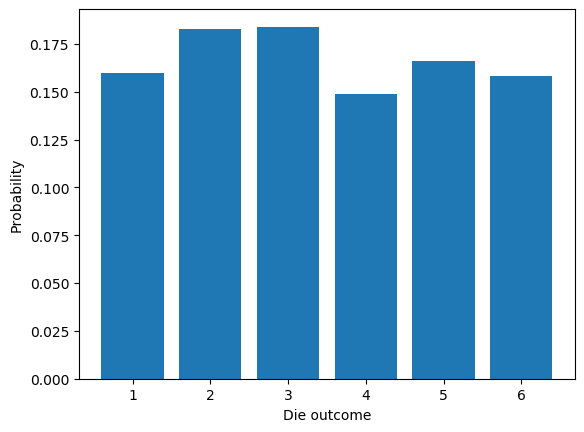

In [2]:
using PyPlot

function simulate_die(ntrials)
    outcomes = collect(1:6)     # Simulate a fair die
    x = rand(outcomes, ntrials);
    bar(outcomes, count_histogram(6, x) / ntrials)
    xlabel("Die outcome")
    ylabel("Probability")
end

simulate_die(1000);

As a generalization, we can simulate rolling a die $n$ times and adding all the outcomes:

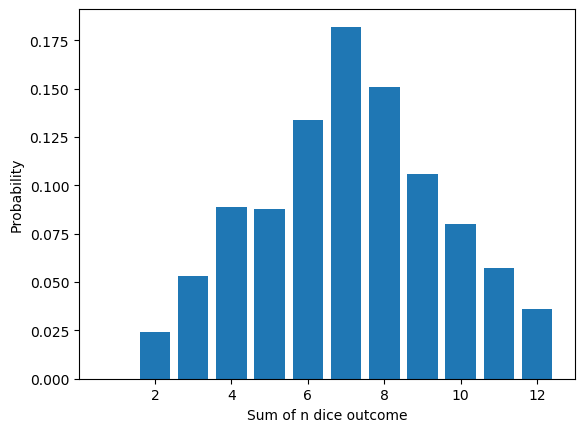

In [3]:
function simulate_sum_of_n_dice(ntrials, ndice)
    outcomes = collect(1:6)     # Simulate fair dice
    x = zeros(Int64, ntrials)
    for i = 1:ndice
        x .+= rand(outcomes, ntrials)
    end
    outcomesn = collect(1:6ndice)
    bar(outcomesn, count_histogram(6ndice, x) / ntrials)
    xlabel("Sum of n dice outcome")
    ylabel("Probability")
end

simulate_sum_of_n_dice(1000, 2);    # Two dice

The famous *central limit theorem* states that this distribution approaches a normal distribution as the number of dice rolls increases:

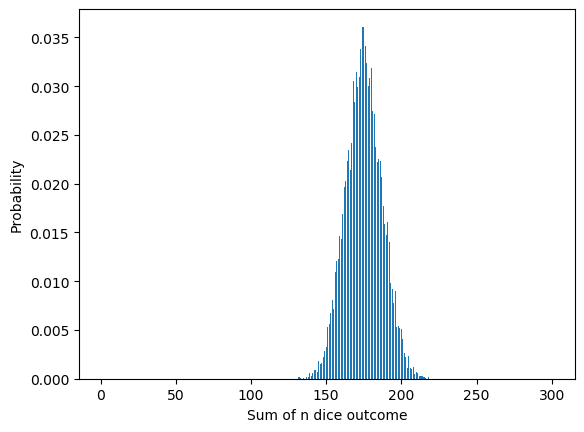

In [4]:
simulate_sum_of_n_dice(10000, 50);

## General histogram into bins

PyPlot also provides a histogram function which can automatically choose an arbitrary number of "bins". For example, this code histograms 10000 random numbers from the normal distribution by counting the frequencies inside each of 50 equally sized bins:

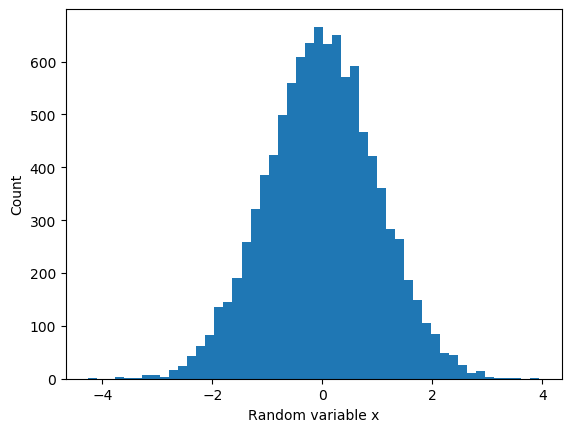

In [5]:
x = randn(10000)
nbins = 50

plt.hist(x, nbins)
xlabel("Random variable x")
ylabel("Count");